В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [10]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### MLS method

In [12]:
def least_sq_method(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

X = non_smoker_df.age
y = non_smoker_df.charges
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X] 

coeff_MLS =least_sq_method(X_with_intercept, y)
print('coeff_MLS:', coeff_MLS)

predictions_MLS = np.dot(X_with_intercept, coeff_MLS) 
print('predictions_MLS:', predictions_MLS)

#RMSE
square_sum = np.sum((np.subtract(predictions_MLS, y))**2)
RMSE = np.sqrt(square_sum/np.size(y))
print('RMSE_LMS:', RMSE)

coeff_MLS: [-2091.42055657   267.24891283]
predictions_MLS: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
RMSE_LMS: 4662.505766636395


### Full batch gradient descent method

coeff_fbgd for lr=0.001: 220.5792061917116 -18.647291530143125
predictions_fbgd for lr=0.001: [3951.77841992 6157.57048184 7260.4665128  ... 3951.77841992 3951.77841992
 4613.5160385 ]
RMSE_fbgd for lr=0.001: 4714.406277887308


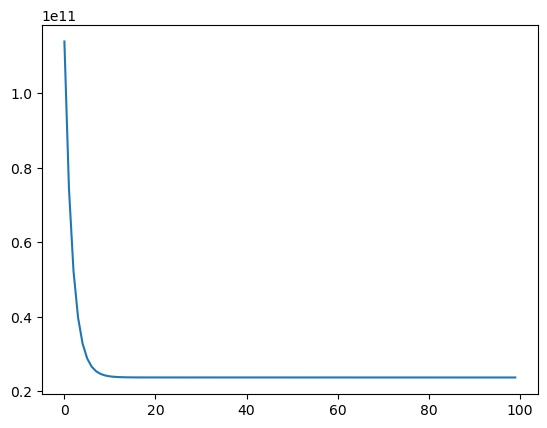

In [4]:
X = non_smoker_df.age
y = non_smoker_df.charges
XX= np.c_[np.ones((X.shape[0], 1)), X] 

def full_batch_gradient_descent(X, y, lr=0.01, epochs=10):
    m, b = 0.0, 0.0
    n =len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:,1] + b
        error = y_pred -y
        errors.append(sum(error**2))
        m_gradient = np.dot(error, X[:, 1])/n
        b_gradient = np.sum(error)/n
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m1, b1, errors1 = full_batch_gradient_descent(XX, y, lr=0.001, epochs=100)
predictions_fbgd1 = m1 *XX[:, 1] + b1

def RMSE_fbgd(predictions_fbgd):
    y = non_smoker_df.charges
    square_sum = np.sum((np.subtract(predictions_fbgd, y))**2)
    RMSE = np.sqrt(square_sum/np.size(y))
    return RMSE

print('coeff_fbgd for lr=0.001:', m1, b1)
print('predictions_fbgd for lr=0.001:', predictions_fbgd1)
print('RMSE_fbgd for lr=0.001:', RMSE_fbgd(predictions_fbgd1))

plt.plot(errors1)
plt.show() 

coeff_fbgd for lr=0.0001: 220.10120618595232 2.5824031319565814
predictions_fbgd for lr=0.0001: [3964.40411448 6165.41617634 7265.92220727 ... 3964.40411448 3964.40411448
 4624.70773304]
RMSE_fbgd for lr=0.0001: 4715.46886823035


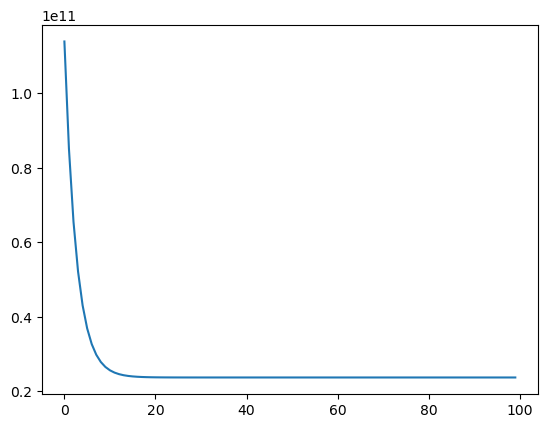

In [13]:
m2, b2, errors2 = full_batch_gradient_descent(XX, y, lr=0.0001, epochs=100)
predictions_fbgd2 = m2 *XX[:, 1] + b2

print('coeff_fbgd for lr=0.0001:', m2, b2)
print('predictions_fbgd for lr=0.0001:', predictions_fbgd2)
print('RMSE_fbgd for lr=0.0001:', RMSE_fbgd(predictions_fbgd2))

plt.plot(errors2)
plt.show() 

coeff_fbgd for lr=0.00001: 182.4119426901148 3.8696617596406733
predictions_fbgd for lr=0.00001: [3287.28463018 5111.40405708 6023.46377053 ... 3287.28463018 3287.28463018
 3834.52045825]
RMSE_fbgd for lr=0.00001: 4971.6971664857265


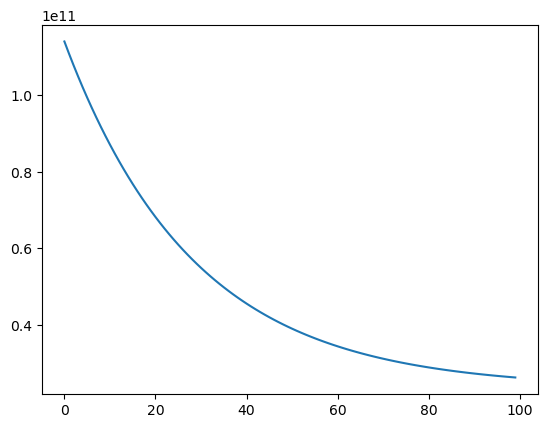

In [14]:
m3, b3, errors3 = full_batch_gradient_descent(XX, y, lr=0.00001, epochs=100)
predictions_fbgd3 = m3 *XX[:, 1] + b3

print('coeff_fbgd for lr=0.00001:', m3, b3)
print('predictions_fbgd for lr=0.00001:', predictions_fbgd3)
print('RMSE_fbgd for lr=0.00001:', RMSE_fbgd(predictions_fbgd3))

plt.plot(errors3)
plt.show() 

### Scikit-learn linear regression

In [15]:
X_new = X.to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X_new, y)
print('coef_sklearn:', lin_reg.coef_, lin_reg.intercept_)
predictions_sklearn = lin_reg.predict(X_new)
print(predictions_sklearn)

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print('rmse_sklearn:', rmse_sklearn)

coef_sklearn: [267.24891283] -2091.4205565650827
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
rmse_sklearn: 4662.505766636395


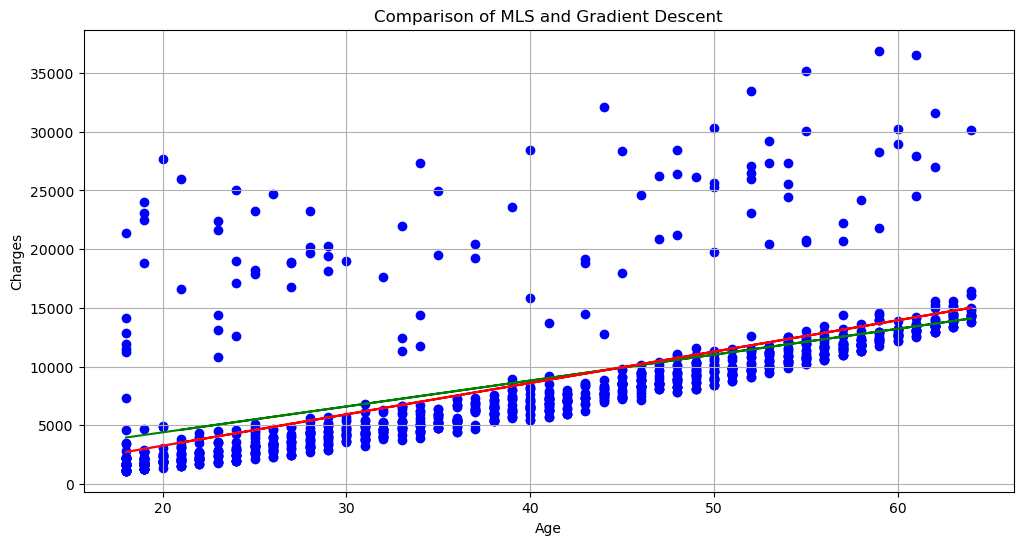

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MLS, color='violet', label='MLS')
plt.plot(X, predictions_fbgd1, color='green', label='Full-batch Gradient Descsnt')
plt.plot(X, predictions_sklearn, color='red', label='Sklearn')
plt.title('Comparison of MLS and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

Висновок: Результати моделей МНК і Scikit-learn Linear Regression співпадають. Результати моделі Full-Batch градієнтного спуску трішки відрізняються. 

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

coef: [305.23760211] 20294.128126915966
rmse: 10711.00334810241


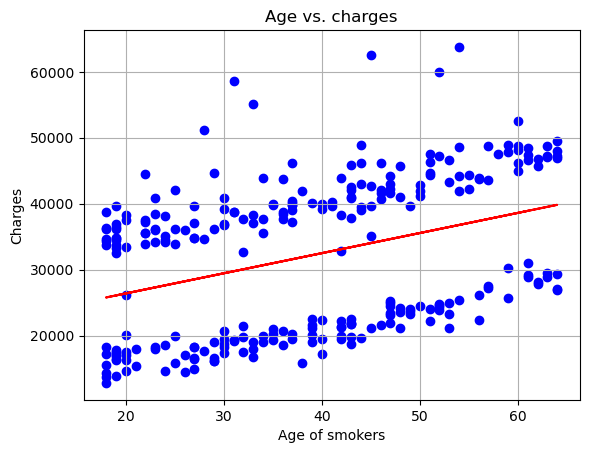

In [17]:
smoker_df = medical_df[medical_df.smoker == 'yes']

X_smoker = smoker_df.age
y_smoker = smoker_df.charges
X_smoker_new = X_smoker.to_frame()
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker_new, y_smoker)
print('coef:', lin_reg_smoker.coef_, lin_reg_smoker.intercept_)
predictions = lin_reg_smoker.predict(X_smoker_new)

rmse = root_mean_squared_error(y_smoker, predictions)
print('rmse:', rmse)

plt.scatter(X_smoker, y_smoker, color='blue')
plt.plot(X_smoker, predictions, color='red')

plt.title('Age vs. charges')
plt.xlabel('Age of smokers')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

Висновок: ВВажаю, що модель не дуже хороша і потрібно проаналізувати чому графік ділиться на 2 частини і врахувати це в наступній моделі.